In [47]:
import tensorflow as tf 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam 
from keras.utils.np_utils import to_categorical

from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [48]:
csv_filename = "qc aggregated data.csv"
df = pd.read_csv(csv_filename)
df[["tempmax", "tempmin", "temp", "feelslikemax", "feelslikemin", "feelslike", "dew", "humidity", "windspeed", "winddir", "conditions"]]

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,conditions
0,29.3,24.5,26.9,32.3,24.5,28.7,22.6,77.4,8.8,4.5,"Rain, Partially cloudy"
1,31.0,24.7,27.6,35.4,24.7,29.2,21.9,72.1,16.7,69.1,"Rain, Partially cloudy"
2,31.9,22.8,27.1,34.2,22.8,28.0,19.7,65.0,17.1,66.2,Partially cloudy
3,31.2,21.6,26.8,34.4,21.6,27.9,20.3,68.7,11.1,44.0,"Rain, Partially cloudy"
4,30.9,23.3,27.1,33.0,23.3,28.2,21.1,71.0,17.2,77.8,"Rain, Partially cloudy"
...,...,...,...,...,...,...,...,...,...,...,...
1303,30.8,25.7,27.8,38.8,25.7,32.4,25.4,86.5,16.7,233.0,"Rain, Overcast"
1304,29.9,24.2,26.9,37.3,24.2,29.6,24.9,89.5,14.6,228.3,"Rain, Overcast"
1305,29.4,21.9,25.7,36.3,21.9,26.9,25.0,94.9,11.2,265.7,"Rain, Overcast"
1306,28.0,24.9,26.6,34.5,24.9,29.0,25.1,92.0,19.3,254.2,"Rain, Overcast"


In [49]:
X = df[["tempmax", "tempmin", "temp", "feelslikemax", "feelslikemin", "feelslike", "dew", "humidity", "windspeed", "winddir"]]
y = df["conditions"]
X = np.array(X)
y = np.array(y)

le = LabelEncoder()
le.fit(y)
y = le.transform(y)
y = to_categorical(y)

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_t, y_t, test_size=0.2, random_state=0)

In [51]:
y_train.shape

(836, 4)

Epoch 1/50


27/27 - 2s - loss: 5.7476 - accuracy: 0.3983 - val_loss: 1.0487 - val_accuracy: 0.5381 - 2s/epoch - 58ms/step
Epoch 2/50
27/27 - 0s - loss: 0.8512 - accuracy: 0.6160 - val_loss: 0.8118 - val_accuracy: 0.5143 - 108ms/epoch - 4ms/step
Epoch 3/50
27/27 - 0s - loss: 0.7910 - accuracy: 0.6112 - val_loss: 0.6730 - val_accuracy: 0.7190 - 100ms/epoch - 4ms/step
Epoch 4/50
27/27 - 0s - loss: 0.7122 - accuracy: 0.6758 - val_loss: 0.7343 - val_accuracy: 0.7143 - 97ms/epoch - 4ms/step
Epoch 5/50
27/27 - 0s - loss: 0.6844 - accuracy: 0.7081 - val_loss: 0.5794 - val_accuracy: 0.7048 - 104ms/epoch - 4ms/step
Epoch 6/50
27/27 - 0s - loss: 0.6453 - accuracy: 0.7189 - val_loss: 0.5704 - val_accuracy: 0.7524 - 102ms/epoch - 4ms/step
Epoch 7/50
27/27 - 0s - loss: 0.6935 - accuracy: 0.6818 - val_loss: 0.6946 - val_accuracy: 0.6286 - 96ms/epoch - 4ms/step
Epoch 8/50
27/27 - 0s - loss: 0.6395 - accuracy: 0.7261 - val_loss: 0.5621 - val_accuracy: 0.7476 - 113ms/epoch - 4ms/step
Epoch 9/50
27/27 - 0s - loss: 0

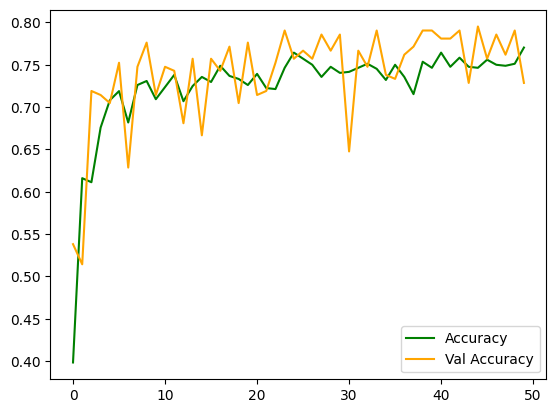

In [52]:
model = Sequential([
    layers.InputLayer(10, ),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])

model.compile(
    #loss='mae',
    #optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), 
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics=["accuracy"])

history = model.fit(
    X_train,
    y_train, 
    validation_data = (X_valid, y_valid),
    epochs = 50,
    verbose = 2
)

plt.plot(history.history["accuracy"], label="Accuracy", color="green")
plt.plot(history.history["val_accuracy"], label="Val Accuracy", color="orange")
plt.legend()
plt.show()

In [58]:
test_pred = model.predict(X_train)
test_pred = np.argmax(to_categorical(test_pred), axis=1)
test_pred = le.inverse_transform(test_pred)

test_pred

27/27 [==============================] - 0s 2ms/step


c:\Users\Alaric\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast',
       'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast',
       'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast',
       'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast',
       'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast',
       'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast',
       'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast',
       'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast',
       'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast',
       'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast',
       'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast',
       'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast',
       'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast',
       'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast',
       'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overca

# Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

X = df[["tempmax", "tempmin", "temp", "feelslikemax", "feelslikemin", "feelslike", "dew", "humidity", "windspeed", "winddir"]]
y = df["conditions"]

le = LabelEncoder()
le.fit(y)
y = le.transform(y)

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_t, y_t, test_size=0.2, random_state=0)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
clf.score(X_test, y_test)




0.7748091603053435

In [83]:
y_preds, y_test

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [85]:
np.unique(y_preds)

array([1, 2, 3])

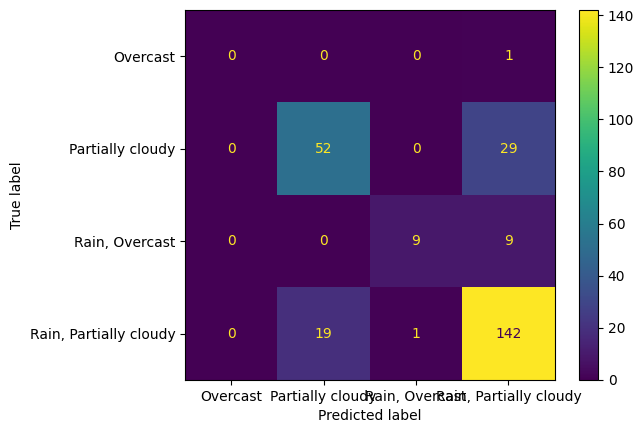

In [74]:
CM = confusion_matrix(y_test, y_preds)
ConfusionMatrixDisplay(CM, display_labels=le.classes_).plot()


In [ ]:
# importing the required libraries for logistic regression
from sklearn.linear_model import LogisticRegression

np.random.seed(42)
#njobs was set to -1 for high computational power and max_iter was increased as I was having some warning.. 
LR = LogisticRegression(solver = "newton-cg", multi_class = "multinomial", max_iter= 500, n_jobs = -1)

LR.fit(X_train, y_train)

y_preds = LR.predict(X_test)

#Confusion Matrix for Logistic Regression
CM = confusion_matrix(y_test, y_preds)
ConfusionMatrixDisplay(CM).plot();

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_score(y_test, y_preds), precision_score(y_test, y_preds, average=None), recall_score(y_test, y_preds, average=None), f1_score(y_test, y_preds, average=None)

In [ ]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
np.random.seed(42)
## fit the data to calculate mean and variance of training data
SS.fit(X_train)

## standardize the training set
X_train_SS = SS.fit_transform(X_train)

## standardize the test set using the mean of train set.
X_test_SS =SS.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(42)
KNN = KNeighborsClassifier()

KNN.fit(X_train_SS, y_train)

y_preds = KNN.predict(X_test_SS)

In [ ]:
CM = confusion_matrix(y_test, y_preds)
ConfusionMatrixDisplay(CM).plot();

In [ ]:
accuracy_score(y_test, y_preds), precision_score(y_test, y_preds, average=None), recall_score(y_test, y_preds, average=None), f1_score(y_test, y_preds, average=None)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()

KNN.fit(X_train, y_train)

y_preds = KNN.predict(X_test)

In [ ]:
CM = confusion_matrix(y_test, y_preds)
ConfusionMatrixDisplay(CM).plot();

In [ ]:
accuracy_score(y_test, y_preds), precision_score(y_test, y_preds, average=None), recall_score(y_test, y_preds, average=None), f1_score(y_test, y_preds, average=None)